In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 100)

## Carga del dataset

Utilizando spark se realizo una partición del 2.5% de los datos del dataset original.

In [2]:
with open("header.txt", "r") as f:
    line = f.readline()
    cols = line.split(",")
    
df = pd.read_csv("data_sample.csv", header = None, sep = ",", names = cols)
df.head()

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,202003,2089776,19840630,35.63860,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526,1.00000,10,N,N,CALI,VALLE,CALI,VALLE,\N,NaN,NaN,NaN,NaN,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,1255032.00000,0.00000,1255032.00000,NOM,1391032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,695516.00000,C,0.00000,\N,1255032.00000,NaN,304687.00000
1,201902,2088089,19860727,32.47639,M,UNION LIBRE,NO INFORMA,\N,Independiente,FAMILIAR,20181120,4.00000,8230,N,N,PALMIRA,VALLE,\N,\N,\N,NaN,NaN,NaN,NaN,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,2327500.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,1187025.00000,SIN INFO,NaN,\N,NaN,NaN,187990.00000
2,202001,3892351,19910108,28.93634,M,SOLTERO,TECNOLOGO,OTROS,Independiente,\N,20190802,4.00000,10,N,N,MEDELLIN,ANTIOQUIA,\N,\N,\N,0.00000,0.00000,0.00000,0.00000,0.00000,SI,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,6519750.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,3879251.25000,SIN INFO,NaN,\N,NaN,NaN,862348.92000
3,202008,2897552,19900903,29.88364,M,SOLTERO,BACHILLER,\N,Empleado,\N,20190906,1.00000,10,N,N,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,\N,1.00000,0.00000,0.00000,0.00000,0.00000,NO,0.00000,\N,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,0.00000,0.00000,0.00000,\N,1484205.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,524000.00000,0.00000,0.00000,0.00000,2555000.00000,0.00000,0.00000,1.00000,210681.47500,F,7.00000,\N,NaN,1484205.00000,1056864.00000
4,202001,4782141,19790623,40.48186,F,NO INFORMA,SIN INFORMACION,\N,Empleado,\N,20191211,1.00000,10,N,N,BOGOTA D.C.,CUNDINAMARCA,\N,\N,\N,0.00000,0.00000,0.00000,0.00000,0.00000,NO,0.00000,X,\N,1.00000,1.00000,X,0.00000,\N,\N,NaN,\N,\N,4353538.00000,0.00000,4353538.00000,NOM,4353334.00000,0.00000,0.00000,0.00000,386578.00000,11000.00000,1006000.00000,0.00000,28000.00000,25800000.00000,16242500.00000,751000.00000,211000.00000,0.00000,4.00000,0.00000,1615755.80000,C,0.00000,70831,4353538.00000,3500000.00000,248386.00000


## Analisis exploratorio de datos
### Separación de los datos en categoricos y numericos

In [3]:
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])

In [4]:
numerical.head()

,periodo,id_cli,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,cuota_tc_bancolombia,nro_tot_cuentas,ctas_activas,ctas_embargadas,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,pol_centr_ext,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,202003,2089776,19840630,35.63860,20180526,1.00000,10,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,1255032.00000,0.00000,1255032.00000,1391032.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,695516.00000,0.00000,1255032.00000,NaN,304687.00000
1,201902,2088089,19860727,32.47639,20181120,4.00000,8230,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,2327500.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,1187025.00000,NaN,NaN,NaN,187990.00000
2,202001,3892351,19910108,28.93634,20190802,4.00000,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,6519750.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,3879251.25000,NaN,NaN,NaN,862348.92000
3,202008,2897552,19900903,29.88364,20190906,1.00000,10,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,0.00000,0.00000,0.00000,1484205.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,524000.00000,0.00000,0.00000,0.00000,2555000.00000,0.00000,0.00000,1.00000,210681.47500,7.00000,NaN,1484205.00000,1056864.00000
4,202001,4782141,19790623,40.48186,20191211,1.00000,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,NaN,4353538.00000,0.00000,4353538.00000,4353334.00000,0.00000,0.00000,0.00000,386578.00000,11000.00000,1006000.00000,0.00000,28000.00000,25800000.00000,16242500.00000,751000.00000,211000.00000,0.00000,4.00000,0.00000,1615755.80000,0.00000,4353538.00000,3500000.00000,248386.00000


In [5]:
categorical.head()

,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,tenencia_tc,tiene_consumo,tiene_crediagil,tiene_ctas_activas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cat_ingreso,rep_calif_cred,convenio_lib
0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,N,N,CALI,VALLE,CALI,VALLE,\N,NO,\N,\N,X,\N,\N,\N,\N,NOM,C,\N
1,M,UNION LIBRE,NO INFORMA,\N,Independiente,FAMILIAR,N,N,PALMIRA,VALLE,\N,\N,\N,NO,\N,\N,X,\N,\N,\N,\N,\N,SIN INFO,\N
2,M,SOLTERO,TECNOLOGO,OTROS,Independiente,\N,N,N,MEDELLIN,ANTIOQUIA,\N,\N,\N,SI,\N,\N,X,\N,\N,\N,\N,\N,SIN INFO,\N
3,M,SOLTERO,BACHILLER,\N,Empleado,\N,N,N,MEDELLIN,ANTIOQUIA,MEDELLIN,ANTIOQUIA,\N,NO,\N,\N,X,\N,\N,\N,\N,\N,F,\N
4,F,NO INFORMA,SIN INFORMACION,\N,Empleado,\N,N,N,BOGOTA D.C.,CUNDINAMARCA,\N,\N,\N,NO,X,\N,X,\N,\N,\N,\N,NOM,C,70831


### Trabajando con las variables categoricas
Analisis de datos faltantes

In [6]:
categorical.isna().sum()

genero                         3
estado_civil                   0
nivel_academico                0
profesion                      0
ocupacion                      0
tipo_vivienda                  0
ind_mora_vigente               0
cartera_castigada              0
ciudad_residencia              0
departamento_residencia        0
ciudad_laboral                 0
departamento_laboral           0
rechazo_credito                0
tenencia_tc                    0
tiene_consumo                  0
tiene_crediagil                0
tiene_ctas_activas             0
tiene_ctas_embargadas          0
pension_fopep                  0
tiene_cred_hipo_1            431
tiene_cred_hipo_2          40382
cat_ingreso                    0
rep_calif_cred                 0
convenio_lib                   0
dtype: int64

Los datos faltantes para las variables categoricas son elevados solo para el caso de los clientes con cuentas hipotecarias. Esto no implica que realmente sea un dato faltante, pero para no eliminar casi 40 mil registros de datos, esos valores se imputaran utilizando la variable numerica de la cuota hipotecaria

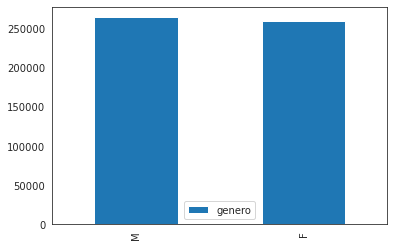

In [7]:
x = pd.DataFrame(categorical["genero"].value_counts())
x.plot.bar();

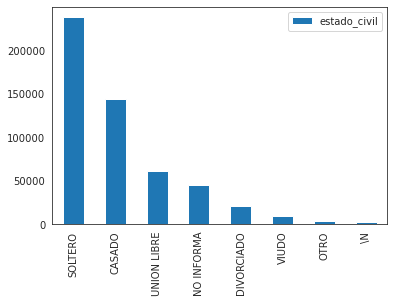

In [8]:
x = pd.DataFrame(categorical["estado_civil"].value_counts())
x.plot.bar();

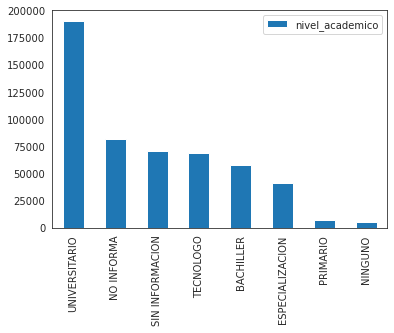

In [9]:
x = pd.DataFrame(categorical["nivel_academico"].value_counts())
x.plot.bar();

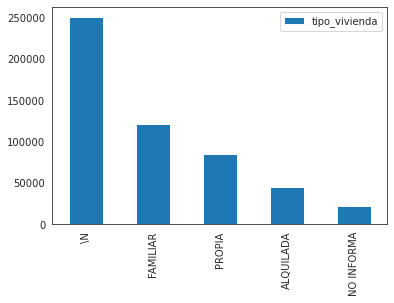

In [10]:
x = pd.DataFrame(categorical["tipo_vivienda"].value_counts())
x.plot.bar();

En el histograma anterior puede observarse un problema importante, para la variable tipo de vivienda existe una importante cantidad de valores nulos, un total de aproximadamente 250 mil valores, lo cual nos indica que si bien esta variable es de vital importancia por razones implicitas a la variable objetivo. Una pregunta importante aqui es si el dataset completo también tiene un mayor numero de variables nulas, ya que este dataset es un dataset muestreado de manera aleatoria con un dataset de 20 millone de registros. Si lo anterior se cumple, es mejor no trabajar con la variable de tipo de vivienda, de lo contrario es necesario hacer un re muestreo de los datos para la evaluación de modelos.

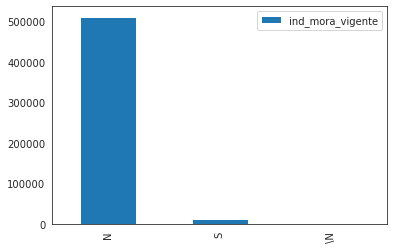

In [11]:
x = pd.DataFrame(categorical["ind_mora_vigente"].value_counts())
x.plot.bar();

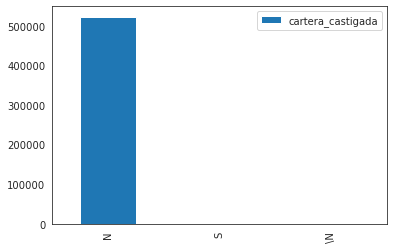

In [12]:
x = pd.DataFrame(categorical["cartera_castigada"].value_counts())
x.plot.bar();

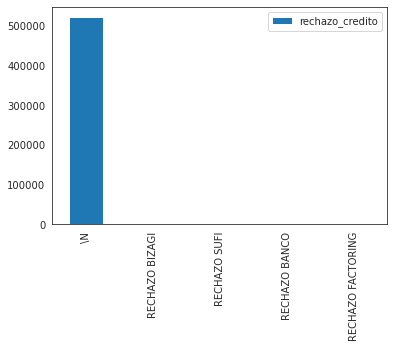

In [13]:
x = pd.DataFrame(categorical["rechazo_credito"].value_counts())
x.plot.bar();

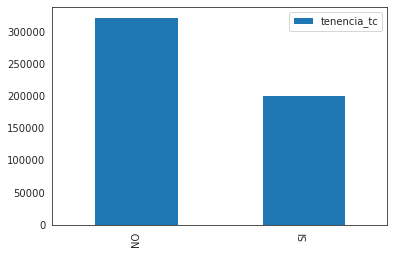

In [14]:
x = pd.DataFrame(categorical["tenencia_tc"].value_counts())
x.plot.bar();

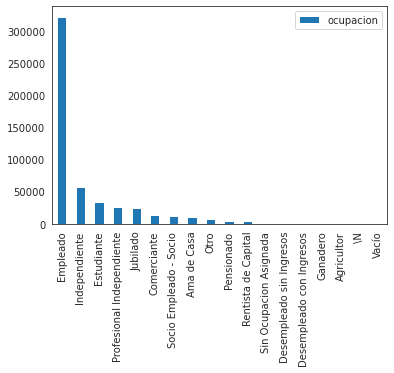

In [15]:
x = pd.DataFrame(categorical["ocupacion"].value_counts())
x.plot.bar();

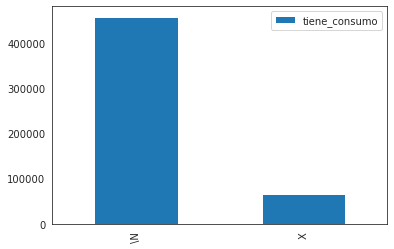

In [16]:
x = pd.DataFrame(categorical["tiene_consumo"].value_counts())
x.plot.bar();

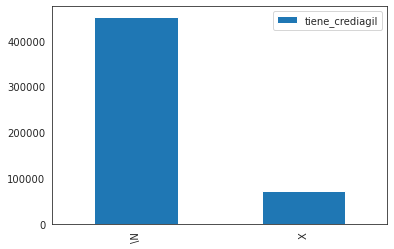

In [17]:
x = pd.DataFrame(categorical["tiene_crediagil"].value_counts())
x.plot.bar();

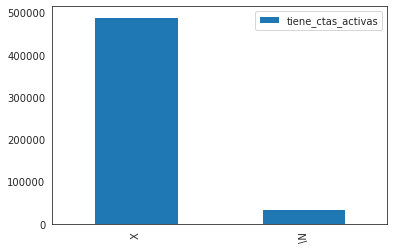

In [18]:
x = pd.DataFrame(categorical["tiene_ctas_activas"].value_counts())
x.plot.bar();

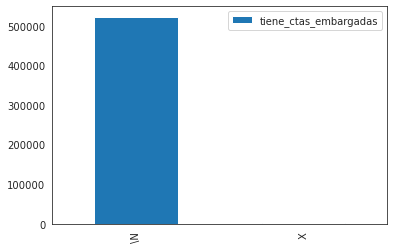

In [19]:
x = pd.DataFrame(categorical["tiene_ctas_embargadas"].value_counts())
x.plot.bar();

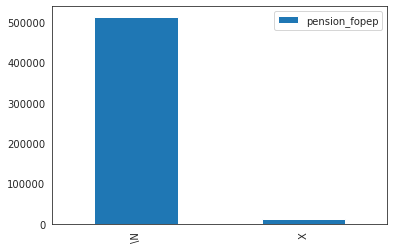

In [20]:
x = pd.DataFrame(categorical["pension_fopep"].value_counts())
x.plot.bar();

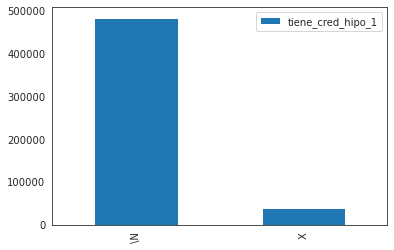

In [21]:
x = pd.DataFrame(categorical["tiene_cred_hipo_1"].value_counts())
x.plot.bar();

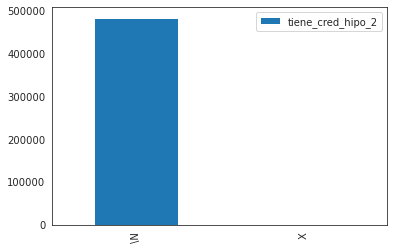

In [22]:
x = pd.DataFrame(categorical["tiene_cred_hipo_2"].value_counts())
x.plot.bar();

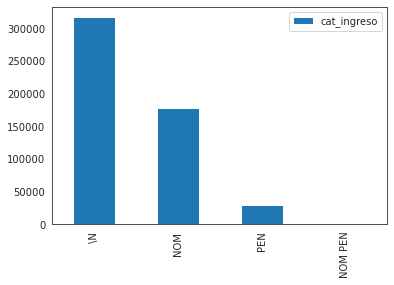

In [23]:
x = pd.DataFrame(categorical["cat_ingreso"].value_counts())
x.plot.bar();

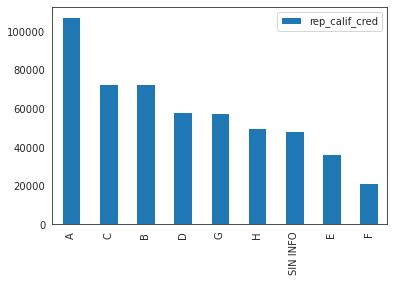

In [24]:
x = pd.DataFrame(categorical["rep_calif_cred"].value_counts())
x.plot.bar();

La gran mayoria de las variables categoricas se encuentran desbalanceadas, si bien en algunos casos es entendible debido a la naturaleza de la variable como tal, en muchos otros casos como en el tipo de vivienda, hay un desbalance negativo al tomar en consideración los valores nulos del dataset. Lo anterior es un problema que debe solucionarse al mirar la distribución de los datos originales y descifrando si eso es un problema general del dataset o un problema particular de este muestreo.

#### La categoria como variable categorica

In [25]:
df = df.dropna(subset = ["categoria"])

In [26]:
df["categoria"] = df["categoria"].astype(float).astype(int)

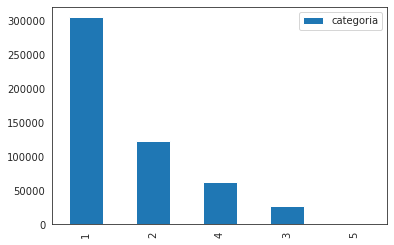

In [27]:
x = pd.DataFrame(df["categoria"].value_counts())
x.plot.bar();

La variable categorica corresponde con una variable de segmentación de clientes que tiene el banco, aqui nuevamente se puede evidenciar un enorme cesgo en la muestra tomada.

#### Variables a no considerar y justificación

Del analisis anterior se considera que las variables a no tener en consideración son las siguientes:

- (ciudad y departamento) No se utilizaran las localidades por su dificultad de limpieza por acentos y caracteres especiales.
- profesion, dado su dificultad para limpiar los datos
- Catera castigada, rechazo de credito, convenio de libranza, categoria del ingreso, dado que estas variables no se relacionan directamente con la variable objetivo
- todas las variables que implican un valor númerico (las que dicen que si tiene algun credito o si tiene pension).
- el grupo de riesgo y la categoria, ya que esta variable importa más para otro problema como la clasificacion de riesgo de creditos

In [28]:
 df = df.drop(["departamento_laboral","ciudad_residencia","ciudad_laboral",
               "profesion","cartera_castigada","rechazo_credito","tiene_consumo", "tiene_crediagil",
               "tiene_ctas_embargadas","pension_fopep","tiene_cred_hipo_1","tiene_cred_hipo_2",
               "cat_ingreso","rep_calif_cred", "convenio_lib", "categoria", "periodo", "id_cli", 
               "codigo_ciiu"], axis = 1)

### Limpieza

eliminación de nulos

In [29]:
df = df.dropna(subset = ["genero"])

In [30]:
def clean_civil_status(x: str) -> str:
    if x == "NO INFORMA" or x == "\\N": return "otro"
    return x.lower()

def clean_academic_level(x: str) -> str:
    if x == "NO INFORMA": return "sin informacion"
    return x.lower()

def clean_house_kind(x: str) -> str:
    if x == "\\N": return "no informa"
    return x.lower()

def clean_occupation(x: str) -> str:
    if x == "\\N" or x == "Sin Ocupacion Asignada" or x == "Vacío":
        return "otro"
    return x.lower()

In [31]:
df["estado_civil"] = df["estado_civil"].apply(clean_civil_status)
df["nivel_academico"] = df["nivel_academico"].apply(clean_academic_level)
df["tipo_vivienda"] = df["tipo_vivienda"].apply(clean_house_kind)
df["ocupacion"] = df["ocupacion"].apply(clean_occupation)

### Binarización de variables categoricas

In [32]:
def binarize_yes_no(x: str) -> int:
    if x == "S" or x == "SI" or x == "X": return 1
    return 0

def binarize_genre(x: str) -> int:
    if x == "M": return 1
    return 0

def binarize_mora(x: float) -> int:
    if x > 0: return 1
    return 0
    

In [33]:
df["ind_mora_vigente"] = df["ind_mora_vigente"].apply(binarize_yes_no)
df["tenencia_tc"] = df["tenencia_tc"].apply(binarize_yes_no)
df["tiene_ctas_activas"] = df["tiene_ctas_activas"].apply(binarize_yes_no)
df["genero"] = df["genero"].apply(binarize_genre)
#df["cant_moras_30_ult_12_meses"] = df["cant_moras_30_ult_12_meses"].apply(binarize_mora)
#df["cant_moras_60_ult_12_meses"] = df["cant_moras_60_ult_12_meses"].apply(binarize_mora)
#df["cant_moras_90_ult_12_meses"] = df["cant_moras_90_ult_12_meses"].apply(binarize_mora)
#df["cant_mora_30_tdc_ult_3m_sf"] = df["cant_mora_30_tdc_ult_3m_sf"].apply(binarize_mora)
#df["cant_mora_30_consum_ult_3m_sf"] = df["cant_mora_30_consum_ult_3m_sf"].apply(binarize_mora)

### Categorización de la edad

In [34]:
def age_categorization(x: float) -> str:
    if x <= 27: return "Z"
    elif 27 < x <= 40: return "Y"
    elif 40 < x <= 52: return "X"
    else: return "BB"

In [35]:
df["edad"] = df["edad"].apply(age_categorization)

In [36]:
df.dtypes

fecha_nacimiento                   int64
edad                              object
genero                             int64
estado_civil                      object
nivel_academico                   object
ocupacion                         object
tipo_vivienda                     object
ult_actual                         int64
ind_mora_vigente                   int64
departamento_residencia           object
mora_max                         float64
cant_moras_30_ult_12_meses       float64
cant_moras_60_ult_12_meses       float64
cant_moras_90_ult_12_meses       float64
cupo_total_tc                    float64
tenencia_tc                        int64
cuota_tc_bancolombia             float64
nro_tot_cuentas                  float64
ctas_activas                     float64
tiene_ctas_activas                 int64
ctas_embargadas                  float64
cuota_cred_hipot                 float64
mediana_nom3                     float64
mediana_pen3                     float64
ingreso_nompen  

### One Hot Encoding

In [37]:
categorical = df.select_dtypes(include=['object'])
names = categorical.columns
names

Index(['edad', 'estado_civil', 'nivel_academico', 'ocupacion', 'tipo_vivienda',
       'departamento_residencia'],
      dtype='object')

In [38]:
df = pd.get_dummies(df, prefix=names)


In [39]:
df = df.drop(["edad_BB", "estado_civil_casado", "nivel_academico_bachiller", 
              "ocupacion_agricultor", "tipo_vivienda_alquilada"], axis = 1)

In [40]:
df.shape

(519203, 109)

### Trabajando con las variables numericas

In [41]:
numerical.dtypes

periodo                            int64
id_cli                             int64
fecha_nacimiento                   int64
edad                             float64
ult_actual                         int64
categoria                        float64
codigo_ciiu                        int64
mora_max                         float64
cant_moras_30_ult_12_meses       float64
cant_moras_60_ult_12_meses       float64
cant_moras_90_ult_12_meses       float64
cupo_total_tc                    float64
cuota_tc_bancolombia             float64
nro_tot_cuentas                  float64
ctas_activas                     float64
ctas_embargadas                  float64
cuota_cred_hipot                 float64
mediana_nom3                     float64
mediana_pen3                     float64
ingreso_nompen                   float64
ingreso_final                    float64
cant_mora_30_tdc_ult_3m_sf       float64
cant_mora_30_consum_ult_3m_sf    float64
cuota_de_vivienda                float64
cuota_de_consumo

Las variables relacionadas con las moras no se van a tener en cuenta dado que si tuvo las moras en meses anteriores, no implican en el actual, para eso existe la variable de mora vigente.

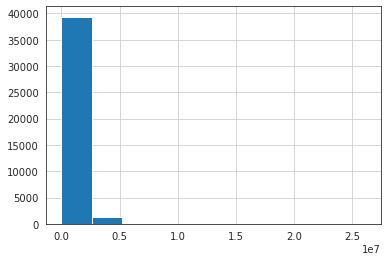

In [42]:
numerical["cuota_cred_hipot"].hist();

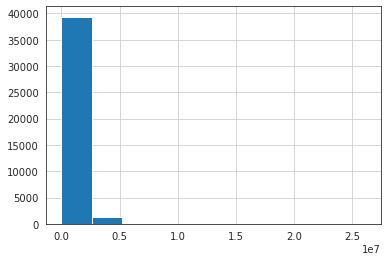

In [43]:
numerical["cuota_cred_hipot"].hist();

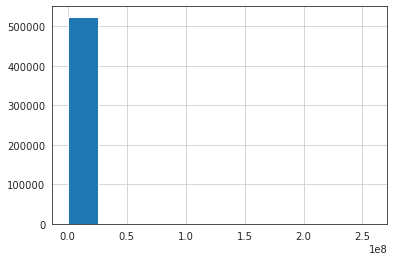

In [44]:
numerical["cuota_de_vivienda"].hist();

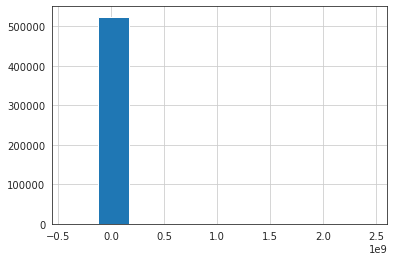

In [45]:
numerical["cuota_de_consumo"].hist();

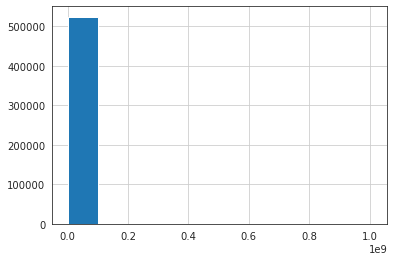

In [46]:
numerical["cuota_rotativos"].hist();

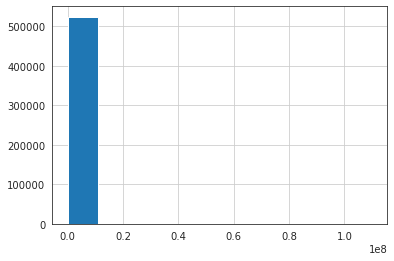

In [47]:
numerical["cuota_tarjeta_de_credito"].hist();

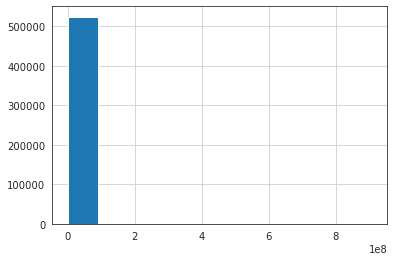

In [48]:
numerical["cuota_de_sector_solidario"].hist();

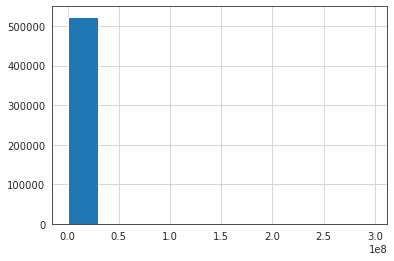

In [49]:
numerical["cuota_sector_real_comercio"].hist();

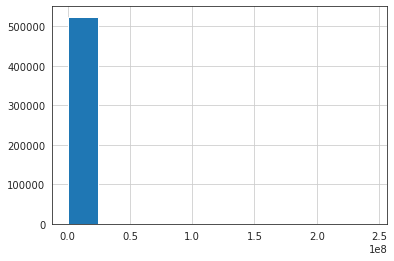

In [50]:
numerical["cuota_tc_mdo"].hist();

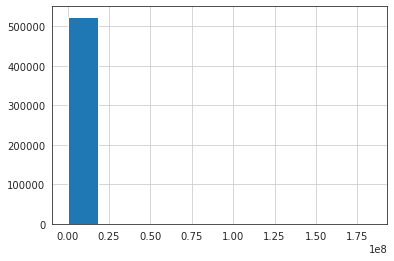

In [51]:
numerical["cuota_libranza_sf"].hist();

De los histogramas anteriores se puede observar que la mayoria de los datos tienen al cero, y eso es debido a que no todos los clientes del banco presentas deudas de algun tipo, ya sea por credito de consumo o hasta por tarjeta de credito, estos valores hacen se cesgue el modelo, pero no pueden ser eliminados. Por otro lado se realiza una corrección para los datos de la variable cuota de consumo, ya que esta presenta unos valores negativos.

In [52]:
df = df[~(df["cuota_de_consumo"] < 0)]

In [53]:
df["cuotas_a_pagar"] = (df["cuota_cred_hipot"] + df["cuota_de_vivienda"] + df["cuota_de_consumo"]
                     + df["cuota_rotativos"] + df["cuota_tarjeta_de_credito"]
                     + df["cuota_de_sector_solidario"] + df["cuota_sector_real_comercio"]
                     + df["cuota_tc_mdo"] + df["cuota_libranza_sf"])
            
df = df.drop(["cuota_cred_hipot", "cuota_de_vivienda", "cuota_de_consumo",
              "cuota_rotativos", "cuota_tarjeta_de_credito", "cuota_de_sector_solidario",
              "cuota_sector_real_comercio", "cuota_tc_mdo", "cuota_libranza_sf"], axis = 1)

Ya que se tiene la variable ingreso final, mantener los otros 3 ingresos sería muy redundante y aportaria a errores en el modelo

In [54]:
df = df.drop(["ingreso_nomina","ingreso_segurida_social","ingreso_nompen"], axis = 1)

Analisis del comportamiento para las siguientes variables:
1. ingreso final
2. ind
3. gasto familiar

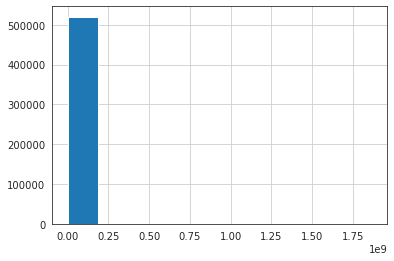

In [55]:
numerical["ingreso_final"].hist();

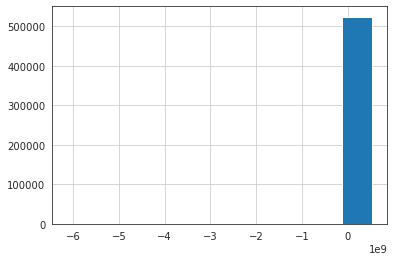

In [56]:
numerical["ind"].hist();

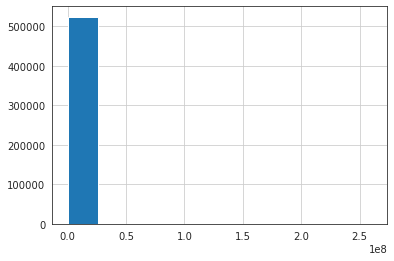

In [57]:
numerical["gasto_familiar"].hist();

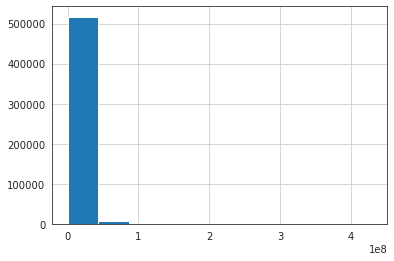

In [58]:
numerical["cupo_total_tc"].hist();

Como se puede apreciar en los histogramas, existen muchos outliers en estas variables, debido a clientes que se reportan con saldos muy bajitos, y otros que se reportan con saldos excesivos. Para esto se eliminaran utilizando los cuantiles

In [59]:
max_gf = df.gasto_familiar.quantile(0.95)
min_gf = df.gasto_familiar.quantile(0.05)
max_if = df.ingreso_final.quantile(0.95)
min_if = df.ingreso_final.quantile(0.05)
max_ind = df.ind.quantile(0.95)
min_ind = df.ind.quantile(0.05)

In [60]:
df = df[(df['ingreso_final'] > min_if) & (df['ingreso_final']< max_if)]
df = df[(df['ind'] > min_ind) & (df['ind']< max_ind)]
df = df[(df['gasto_familiar'] > min_gf) & (df['gasto_familiar']< max_gf)]

<AxesSubplot:>

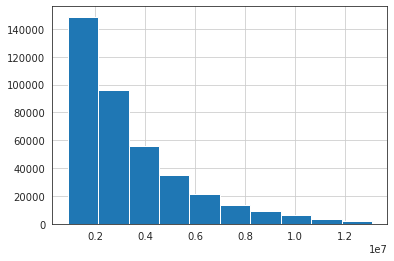

In [61]:
df["ingreso_final"].hist()

<AxesSubplot:>

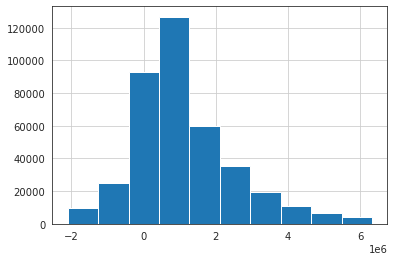

In [62]:
df["ind"].hist()

<AxesSubplot:>

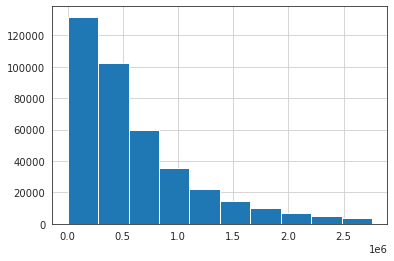

In [63]:
df["gasto_familiar"].hist()

Con la eliminación de outliers los datos han quedado mucho mejor y se puede observar bien sus histogramas

In [64]:
mask = (numerical["ingreso_final"] < 0.5e8)

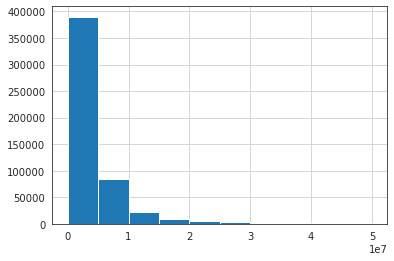

In [65]:
numerical[mask]["ingreso_final"].hist();

In [66]:
df = df.drop(["mora_max", "cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses",
             "cant_moras_90_ult_12_meses", "nro_tot_cuentas", "ctas_activas", "ctas_embargadas",
             "mediana_nom3", "mediana_pen3", "cant_mora_30_tdc_ult_3m_sf", "cant_mora_30_consum_ult_3m_sf",
             "saldo_prom3_tdc_mdo", "cant_cast_ult_12m_sr", "pol_centr_ext", "cupo_tc_mdo",
              "cuota_tc_bancolombia"], axis = 1)

In [67]:
df.dtypes

fecha_nacimiento                     int64
genero                               int64
ult_actual                           int64
ind_mora_vigente                     int64
cupo_total_tc                      float64
                                    ...   
departamento_residencia_VALLE        uint8
departamento_residencia_VAUPES       uint8
departamento_residencia_VICHADA      uint8
departamento_residencia_\N           uint8
cuotas_a_pagar                     float64
Length: 82, dtype: object

In [68]:
df = df.fillna(0)

Esos valores nulos que se pueden apreciar son directamente cero, asi que estos valores serán imputados

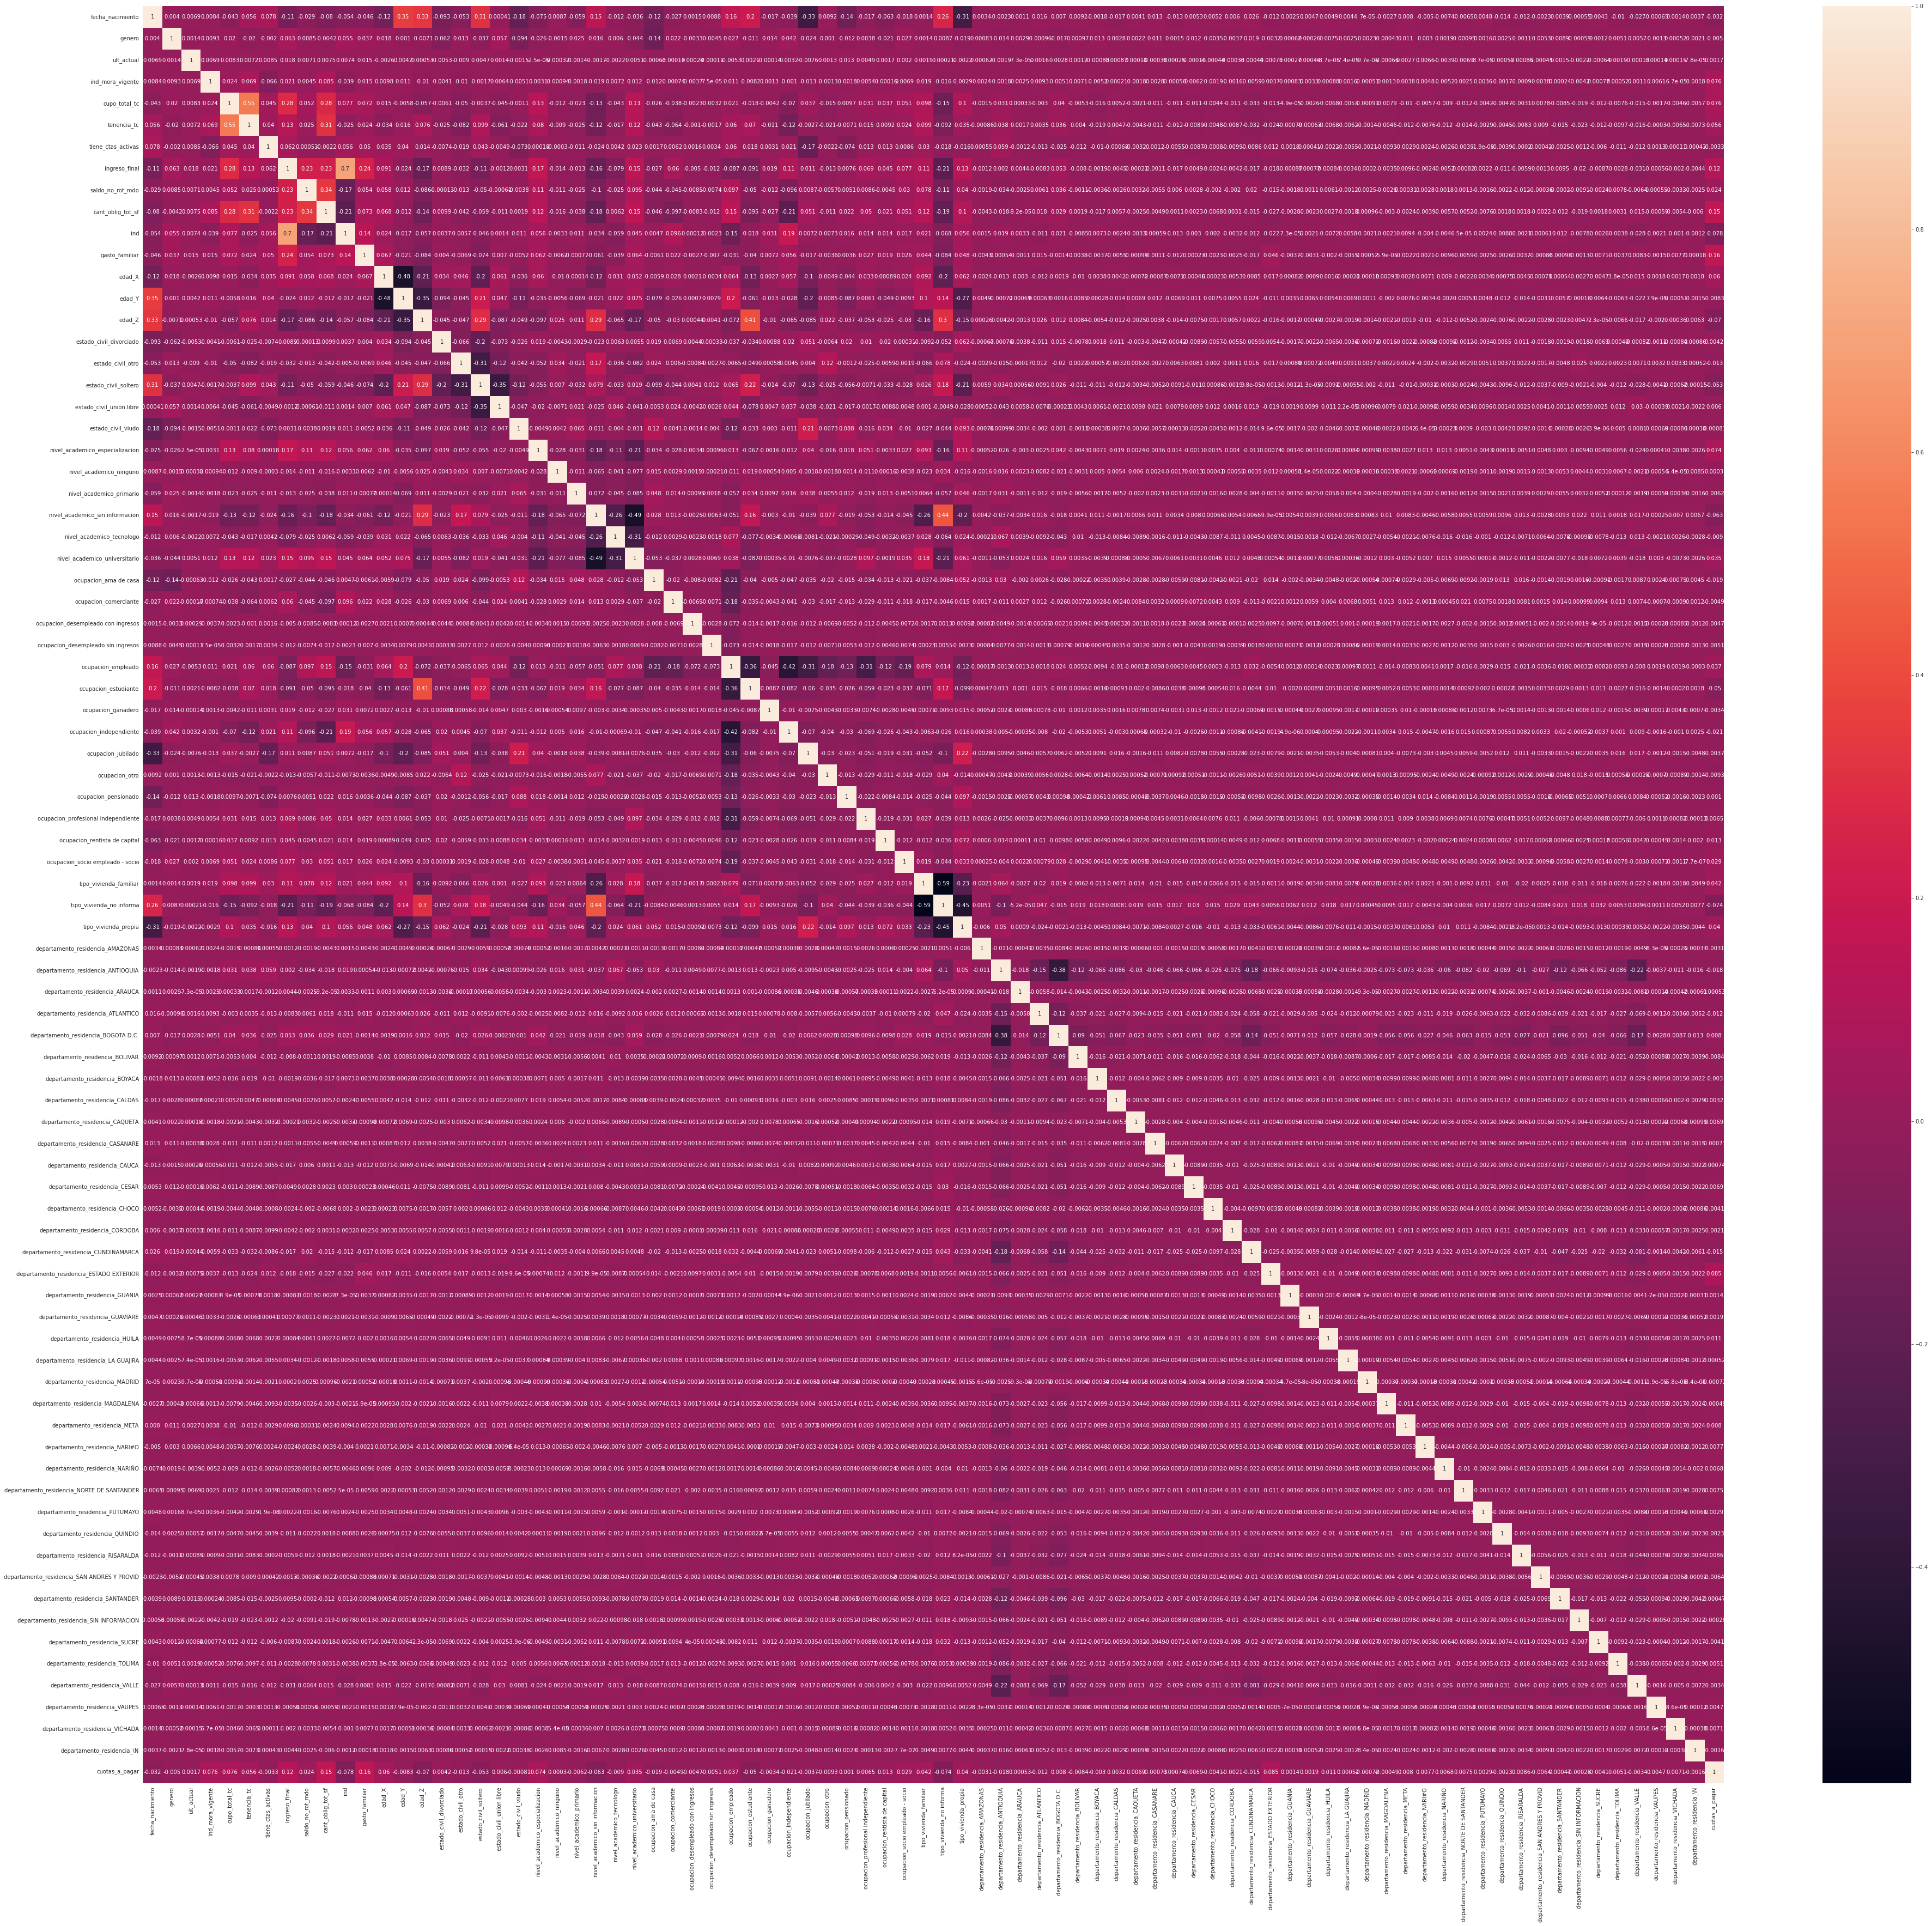

In [69]:
plt.figure(figsize = (65,60))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Dataset Final

In [70]:
df.to_csv("datablob.csv", index = False)

In [76]:
df.shape

(391526, 44)